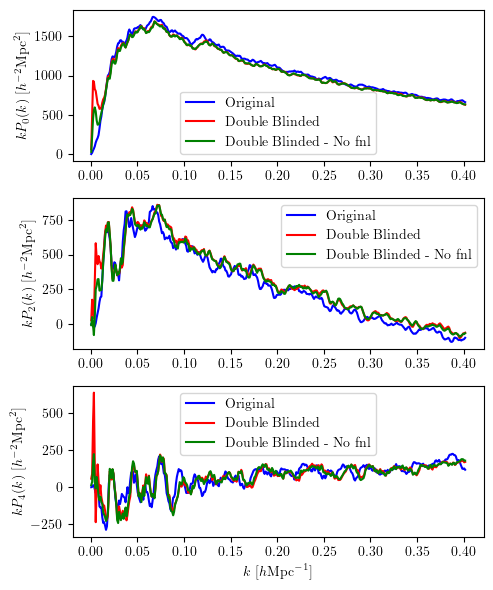

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pypower import PowerSpectrumStatistics

plt.rcParams.update({"text.usetex": True, 'font.family': 'serif'})

# Paths to the Pk files
file1 = "/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/pk/pkpoles_LRG_GCcomb_0.4_0.6_default_FKP_lin.npy"
file2 = "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/LSScats/v0.6/blinded/pk/pkpoles_LRG_GCcomb_0.4_0.6_default_FKP_lin.npy"
file3 = "/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/nofnl/LSScats/v0.6/blinded//pk/pk/pkpoles_LRG_GCcomb_0.4_0.6_default_FKP_lin.npy"

colors = ['blue', 'red', 'green']
labels = ['Original', 'Double Blinded', 'Double Blinded - No fnl']

plt.figure(figsize=(5, 6))

k = PowerSpectrumStatistics.load(file1).k

files = [file1, file2, file3]
for j, file in enumerate(files):
    ps = PowerSpectrumStatistics.load(file)(ell=[0, 2, 4], complex=False)
    
    for i in range(3):
        plt.subplot(3, 1, i+1)
        plt.plot(k, k * ps[i, :], color=colors[j], label=labels[j])

plt.subplot(311)
plt.ylabel(r"$kP_{0}(k)$ $[h^{-2} \mathrm{Mpc}^{2}]$")
plt.legend()
plt.subplot(312)
plt.ylabel(r"$kP_{2}(k)$ $[h^{-2} \mathrm{Mpc}^{2}]$")
plt.legend()
plt.subplot(313)
plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$kP_{4}(k)$ $[h^{-2} \mathrm{Mpc}^{2}]$")
plt.legend()

plt.tight_layout()
plt.show()
